In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg
from IPython.display import display, clear_output
import concurrent.futures
import imageio
import os
from scipy.optimize import leastsq
from scipy.interpolate import interp2d
from matplotlib.colors import hsv_to_rgb
import ipywidgets as widgets

In [2]:
# Open the video file
cap = cv2.VideoCapture('../data/960fps_fly.mp4')

# Get the video frame dimensions
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create an empty list to store the video frames
frames = []

# Read the video frames one by one
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Append the current frame to the list of frames
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # frame = np.fliplr(np.flipud(frame))
        frames.append(frame)
    else:
        break

# Release the video capture object
cap.release()

# Convert the list of frames to a NumPy array
video = np.stack(frames)

# Display the shape of the resulting array
print(video.shape)

(120, 720, 1280, 3)


In [3]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image, ImageEnhance

img = Image.fromarray(video[100])
enhancer = ImageEnhance.Brightness(img)
img = enhancer.enhance(1.2)  # 调整亮度，1.5表示增加亮度
contrast_enhancer = ImageEnhance.Contrast(img)
img = contrast_enhancer.enhance(1.5) 
color_enhancer = ImageEnhance.Color(img)
img = color_enhancer.enhance(1.5)

gamma = 1.5
img = img.convert('RGB')
img = np.array(img)
gamma_correction = np.array(255 * (img / 255) ** (1 / gamma), dtype='uint8')
img = Image.fromarray(gamma_correction)
img = np.array(img)

height, width, _ = img.shape

vertical_lines = [width // 3, 2 * width // 3]
horizontal_lines = [height // 3, 2 * height // 3]

def update_image(vertical0, vertical1, vertical2, vertical3, horizontal0, horizontal1, horizontal2, horizontal3):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axvline(x=vertical0, color='red', linestyle='--')
    plt.axvline(x=vertical1, color='red', linestyle='--')
    plt.axvline(x=vertical2, color='red', linestyle='--')
    plt.axvline(x=vertical3, color='red', linestyle='--')
    plt.axhline(y=horizontal0, color='red', linestyle='--')
    plt.axhline(y=horizontal1, color='red', linestyle='--')
    plt.axhline(y=horizontal2, color='red', linestyle='--')
    plt.axhline(y=horizontal3, color='red', linestyle='--')
    plt.show()

# vertical0_slider = widgets.IntSlider(min=0, max=width, value=0*width // 3, description='Vertical 0')
# vertical0_text = widgets.IntText(value=0*width // 3)
vertical0_slider = widgets.IntSlider(min=0, max=width, value=7, description='Vertical 0')
vertical0_text = widgets.IntText(value=7)
widgets.jslink((vertical0_slider, 'value'), (vertical0_text, 'value'))

# vertical1_slider = widgets.IntSlider(min=0, max=width, value=width // 3, description='Vertical 1')
# vertical1_text = widgets.IntText(value=width // 3)
vertical1_slider = widgets.IntSlider(min=0, max=width, value=407, description='Vertical 1')
vertical1_text = widgets.IntText(value=407)
widgets.jslink((vertical1_slider, 'value'), (vertical1_text, 'value'))

# vertical2_slider = widgets.IntSlider(min=0, max=width, value=2 * width // 3, description='Vertical 2')
# vertical2_text = widgets.IntText(value=2 * width // 3)
vertical2_slider = widgets.IntSlider(min=0, max=width, value=801, description='Vertical 2')
vertical2_text = widgets.IntText(value=801)
widgets.jslink((vertical2_slider, 'value'), (vertical2_text, 'value'))

# vertical3_slider = widgets.IntSlider(min=0, max=width, value=3 * width // 3, description='Vertical 3')
# vertical3_text = widgets.IntText(value=3 * width // 3)
vertical3_slider = widgets.IntSlider(min=0, max=width, value=1187, description='Vertical 3')
vertical3_text = widgets.IntText(value=1187)
widgets.jslink((vertical3_slider, 'value'), (vertical3_text, 'value'))

# horizontal0_slider = widgets.IntSlider(min=0, max=height, value=0, description='Horizontal 0')
# horizontal0_text = widgets.IntText(value=0)
horizontal0_slider = widgets.IntSlider(min=0, max=height, value=27, description='Horizontal 0')
horizontal0_text = widgets.IntText(value=27)
widgets.jslink((horizontal0_slider, 'value'), (horizontal0_text, 'value'))

# horizontal1_slider = widgets.IntSlider(min=0, max=height, value=height // 3, description='Horizontal 1')
# horizontal1_text = widgets.IntText(value=height // 3)
horizontal1_slider = widgets.IntSlider(min=0, max=height, value=240, description='Horizontal 1')
horizontal1_text = widgets.IntText(value=240)
widgets.jslink((horizontal1_slider, 'value'), (horizontal1_text, 'value'))

# horizontal2_slider = widgets.IntSlider(min=0, max=height, value=2 * height // 3, description='Horizontal 2')
# horizontal2_text = widgets.IntText(value=2 * height // 3)
horizontal2_slider = widgets.IntSlider(min=0, max=height, value=470, description='Horizontal 2')
horizontal2_text = widgets.IntText(value=470)
widgets.jslink((horizontal2_slider, 'value'), (horizontal2_text, 'value'))

# horizontal3_slider = widgets.IntSlider(min=0, max=height, value=3 * height // 3, description='Horizontal 3')
# horizontal3_text = widgets.IntText(value=3 * height // 3)
horizontal3_slider = widgets.IntSlider(min=0, max=height, value=683, description='Horizontal 3')
horizontal3_text = widgets.IntText(value=683)
widgets.jslink((horizontal3_slider, 'value'), (horizontal3_text, 'value'))

ui = widgets.VBox([
    widgets.HBox([vertical0_slider, vertical0_text]),
    widgets.HBox([vertical1_slider, vertical1_text]),
    widgets.HBox([vertical2_slider, vertical2_text]),
    widgets.HBox([vertical3_slider, vertical3_text]),
    widgets.HBox([horizontal0_slider, horizontal0_text]),
    widgets.HBox([horizontal1_slider, horizontal1_text]),
    widgets.HBox([horizontal2_slider, horizontal2_text]),
    widgets.HBox([horizontal3_slider, horizontal3_text])
])

out = widgets.interactive_output(update_image, {
    'vertical0': vertical0_slider,
    'vertical1': vertical1_slider,
    'vertical2': vertical2_slider,
    'vertical3': vertical3_slider,
    'horizontal0': horizontal0_slider,
    'horizontal1': horizontal1_slider,
    'horizontal2': horizontal2_slider,
    'horizontal3': horizontal3_slider
})

display(ui, out)

Output()

[7, 407, 801, 1187] [27, 240, 470, 683]


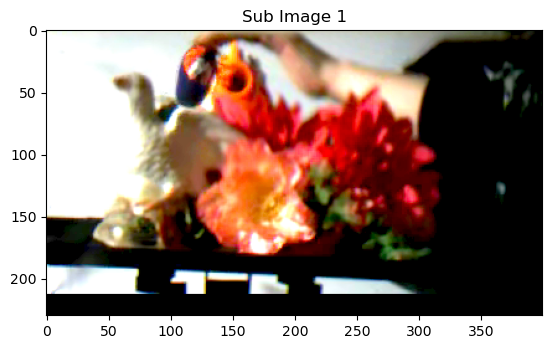

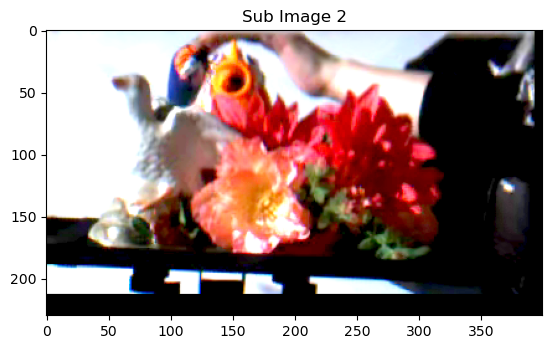

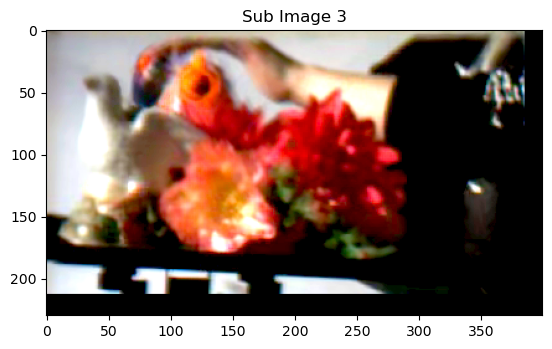

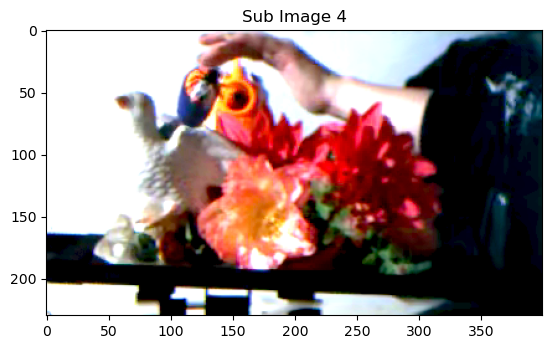

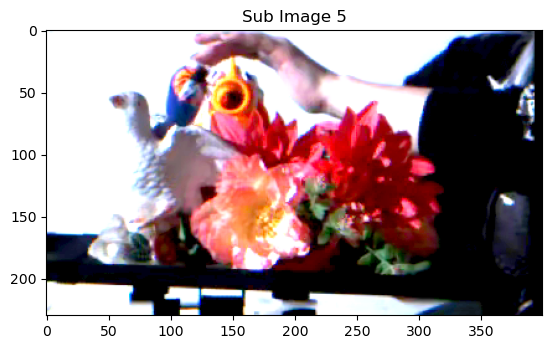

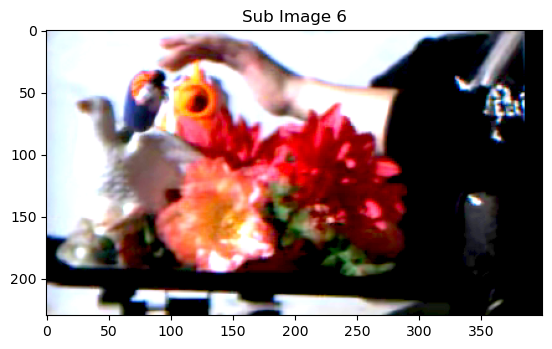

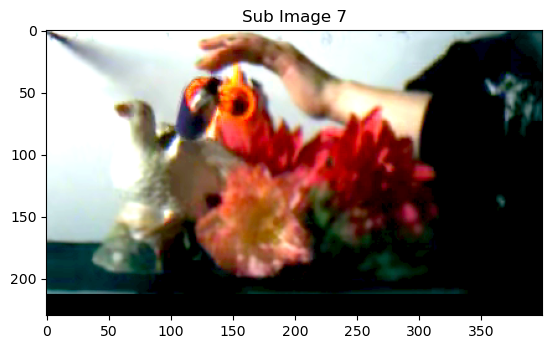

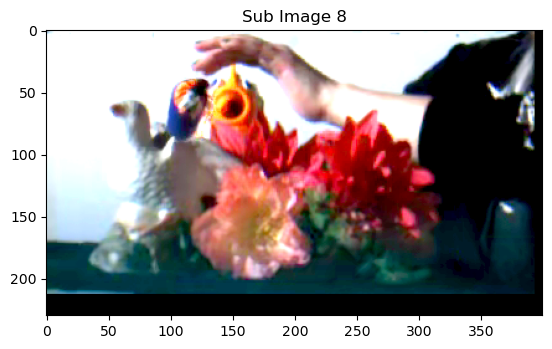

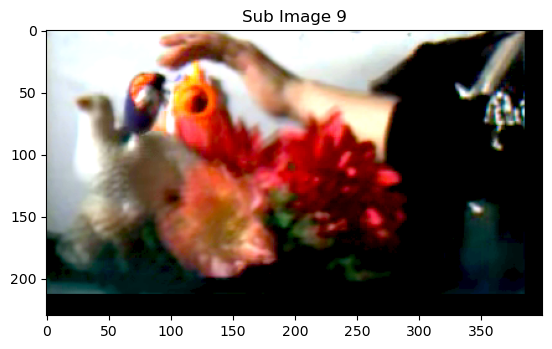

(9, 230, 400, 3)


In [4]:
# vertical_cut = [vertical0_slider.value, vertical1_slider.value, vertical2_slider.value, vertical3_slider.value]
# horizontal_cut = [horizontal0_slider.value, horizontal1_slider.value, horizontal2_slider.value, horizontal3_slider.value]
vertical_cut = [7, 407, 801, 1187]
horizontal_cut = [27, 240, 470, 683]
print(vertical_cut, horizontal_cut)
light_fields = []

sub_widths = [vertical_cut[i + 1] - vertical_cut[i] for i in range(3)]
sub_heights = [horizontal_cut[i + 1] - horizontal_cut[i] for i in range(3)]

light_fields = []
for i in range(3):
    for j in range(3):
        left = vertical_cut[j]
        upper = horizontal_cut[i] 
        right = left + sub_widths[j]
        lower = upper + sub_heights[i]
        sub_img = img[upper:lower, left:right]
        if j % 2 == 0:  # Even column, flip left-right
            sub_img = cv2.flip(sub_img, 1)
        if i % 2 == 0:  # Even row, flip up-down
            sub_img = cv2.flip(sub_img, 0)
        sub_img = cv2.flip(sub_img, 0)
        light_fields.append(sub_img)

max_height = max(sub_img.shape[0] for sub_img in light_fields)
max_width = max(sub_img.shape[1] for sub_img in light_fields)

padded_light_fields = []
for sub_img in light_fields:
    padded_img = np.zeros((max_height, max_width, 3), dtype=sub_img.dtype)
    padded_img[:sub_img.shape[0], :sub_img.shape[1]] = sub_img
    padded_light_fields.append(padded_img)

for idx, sub_img in enumerate(padded_light_fields):
    plt.figure()
    plt.imshow(sub_img)
    plt.title(f'Sub Image {idx + 1}')
    plt.show()

light_fields = np.array(padded_light_fields)
print(light_fields.shape)


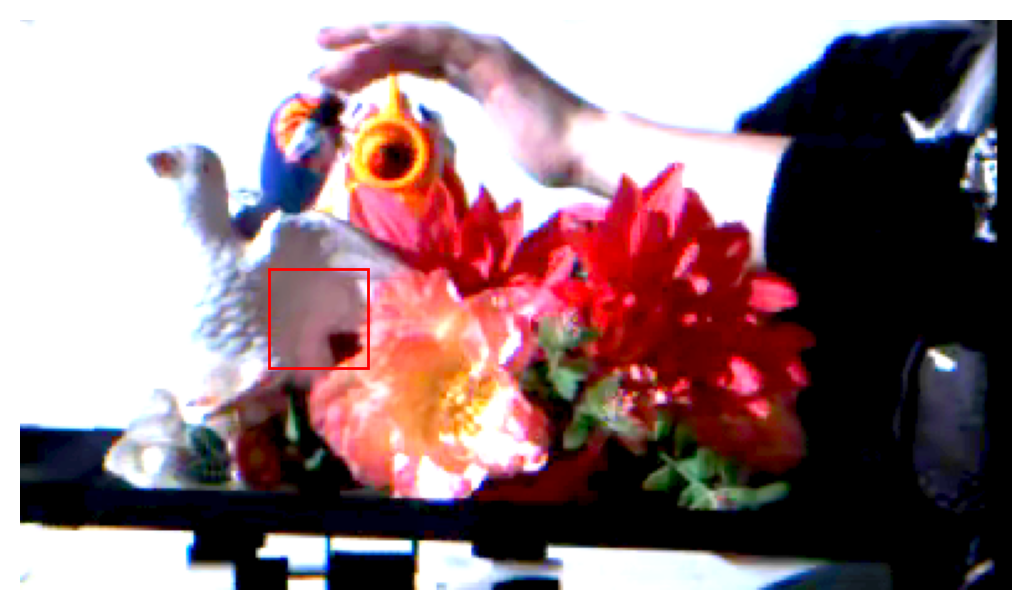

In [5]:
# FOCUS ON THE BACKGROUND
fig, ax = plt.subplots(dpi=200)
patch_size = 40
patchX = 100   #30
patchY = 100     #240
ax.imshow(light_fields[4])
rect = Rectangle((patchY, patchX), patch_size, patch_size, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.axis('off')
template = light_fields[4, patchX:patchX+patch_size, patchY:patchY+patch_size, :]
template = 0.2126 * template[:,:,0] + 0.7152 * template[:,:,1] + 0.0722 * template[:,:,2]
grey_video = 0.2126 * light_fields[:, :, :, 0] + 0.7152 * light_fields[:, :, :, 1] + 0.0722 * light_fields[:, :, :, 2]

[[-13   4]
 [-14   1]
 [-15 -25]
 [  0   5]
 [  0   0]
 [  2 -28]
 [  7   4]
 [  8   0]
 [  4 -29]]
18


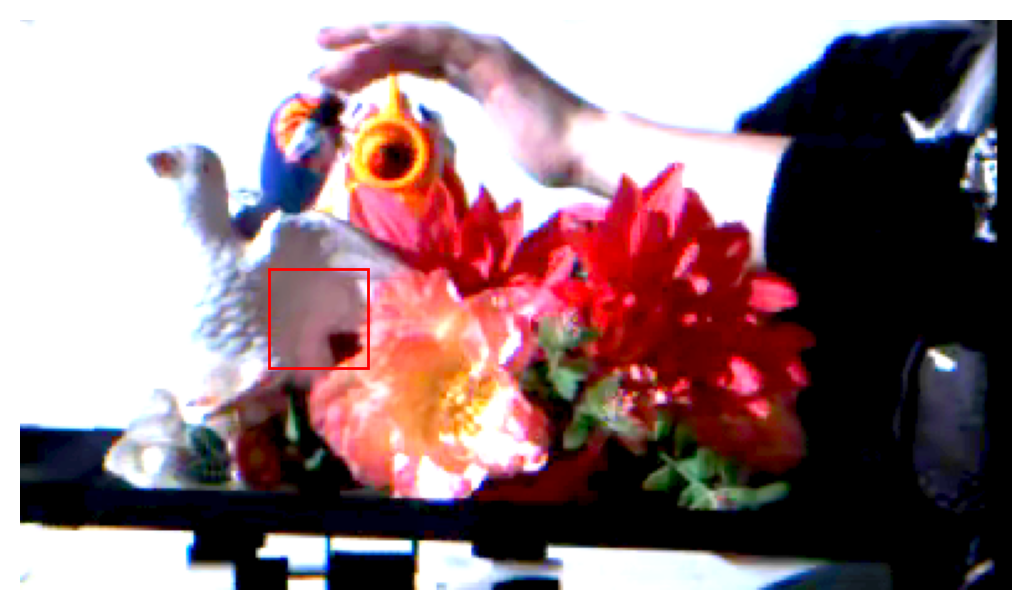

In [6]:
fig, ax = plt.subplots(dpi=200)
ax.imshow(light_fields[4])
rect = Rectangle((patchY, patchX), patch_size, patch_size, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.axis('off')

# Extract and convert the template to grayscale
template = light_fields[4, patchX:patchX + patch_size, patchY:patchY + patch_size, :]

# Initialize arrays
shift = np.empty([light_fields.shape[0], 2])

# Perform template matching
for i in range(light_fields.shape[0]):
    search_area = light_fields[i, :, :, :]
    res = cv2.matchTemplate(search_area, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    left_top = max_loc
    shift[i] = np.array([left_top[0] - patchY, left_top[1] - patchX])

shift = shift.astype(np.int32)
shift = shift.astype(np.int32)[:, ::-1]

# Print results
print(shift)
print(shift.size)

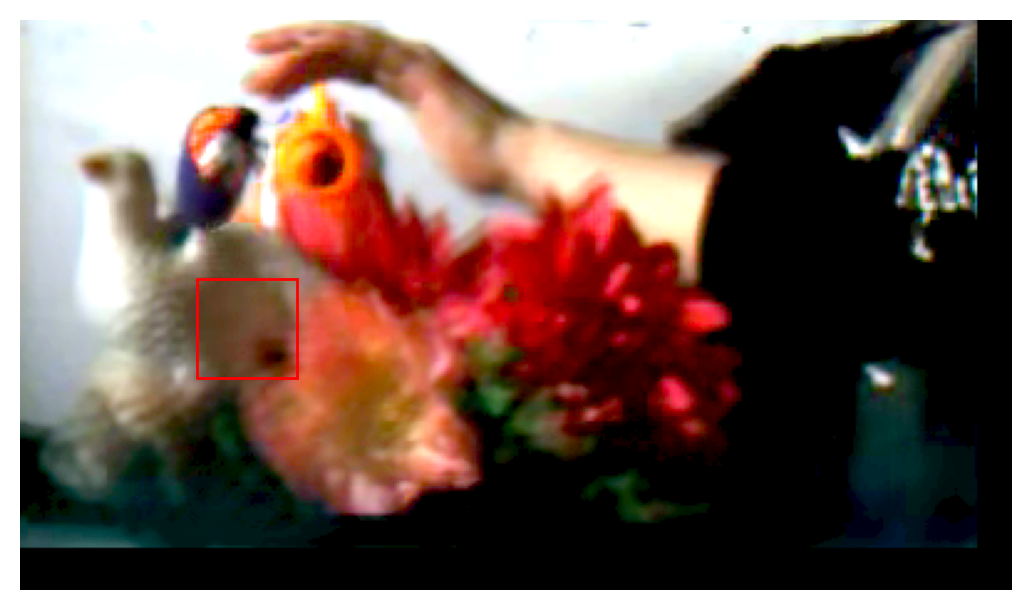

In [7]:
for i in range(light_fields.shape[0]):
    rect = Rectangle((patchY + shift[i, 1], patchX + shift[i, 0]), patch_size, patch_size, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.imshow(light_fields[i])
    ax.axis('off')
    clear_output(wait=True)
    display(fig)
    # Remove each patch individually
    for patch in ax.patches:
        patch.remove()

(230, 400, 3)


/var/folders/vb/5ts99k7d0sq0rd4222dzfrsr0000gn/T/ipykernel_82654/1282470881.py:8: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_img = interp2d(mesh_x, mesh_y , light_fields[f, :, :, c].T)
/var/folders/vb/5ts99k7d0sq0rd4222dzfrsr0000gn/T/ipykernel_82654/1282470881.py:9: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for r

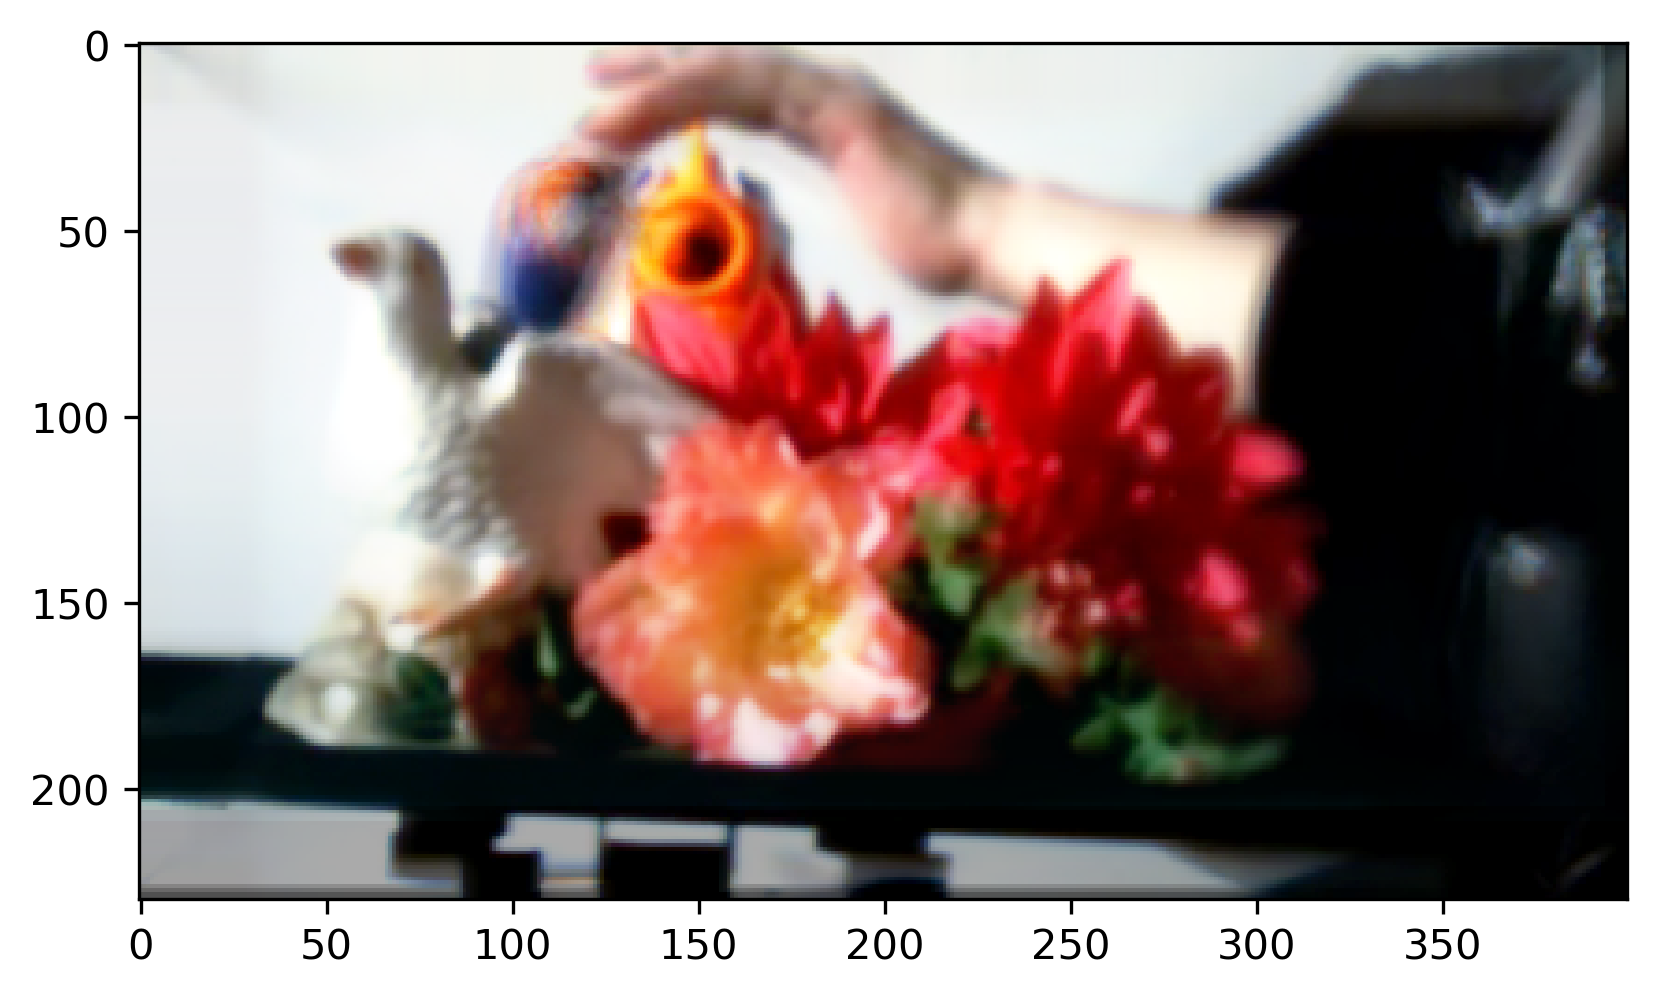

In [8]:
shift = shift - shift[4]
final_image = np.zeros([light_fields.shape[1], light_fields.shape[2], 3])
pad_image = np.zeros([light_fields.shape[1], light_fields.shape[2], 3])
mesh_x, mesh_y = np.arange(0, light_fields.shape[1]), np.arange(0, light_fields.shape[2])
for f in range(light_fields.shape[0]):
    pad_image = np.zeros([light_fields.shape[1], light_fields.shape[2], 3])
    for c in range(3):
        interp_img = interp2d(mesh_x, mesh_y , light_fields[f, :, :, c].T)
        pad_image[:, :, c] = interp_img(mesh_x + shift[f][0], mesh_y + shift[f][1]).T
    final_image += pad_image
final_image = final_image / (light_fields.shape[0]) / 255
plt.figure(dpi=300)
plt.imshow(final_image)
print(final_image.shape)
final_image = (final_image * 255).astype(np.uint8)
# imageio.imwrite("../result_for_code_test/background_refocus.png", final_image)

In [9]:
# Object tracking
tracker = cv2.TrackerCSRT_create()

# Initialize the first frame and select the bounding box
file_start_num = 60
file_end_num = 116
img = video[file_start_num]
left = vertical_cut[1]
upper = horizontal_cut[1]
right = left + sub_widths[1]
lower = upper + sub_heights[1]
middle_img = img[upper:lower, left:right]
# filp the image
middle_img = cv2.flip(middle_img, 0)
print(middle_img.shape)

# bbox = cv2.selectROI('select', middle_img, False)
# cv2.destroyWindow('select')
bbox = [144, 52, 14, 14]

# Initialize tracker with the first frame and bounding box
tracker.init(middle_img, bbox)

# List to store the top-left coordinates of the bounding box
bbox_coords = []
bbox_coords.append((bbox[0], bbox[1]))
print(bbox)

# Object tracking
for file_num in range(file_start_num, file_end_num):
    img = Image.fromarray(video[file_num])
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.2)  # 调整亮度，1.5表示增加亮度
    contrast_enhancer = ImageEnhance.Contrast(img)
    img = contrast_enhancer.enhance(1.5) 
    color_enhancer = ImageEnhance.Color(img)
    img = color_enhancer.enhance(1.5)

    gamma = 1.5
    img = img.convert('RGB')
    img = np.array(img)
    gamma_correction = np.array(255 * (img / 255) ** (1 / gamma), dtype='uint8')
    img = Image.fromarray(gamma_correction)
    img = np.array(img)
    middle_img = img[upper:lower, left:right]
    middle_img = cv2.flip(middle_img, 0)
    # Update tracker
    ret, bbox = tracker.update(middle_img)
    if ret:
        # Tracking success
        x, y, w, h = [int(v) for v in bbox]
        bbox_coords.append((x, y, w, h))
        cv2.rectangle(middle_img, (x, y), (x + w, y + h), (255, 0, 0), 2, 1)
    else:
        # Tracking failure
        cv2.putText(middle_img, "Tracking failure detected", (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

    # Display result
    cv2.imshow("Tracking", middle_img)

    # Wait for a short period to display the image
    cv2.waitKey(30)

cv2.destroyAllWindows()
# Print the coordinates of the bounding box for each frame
# for i, coord in enumerate(bbox_coords):
#     print(f"Frame {i + 1}: Top-left corner at {coord}")

# cv2.destroyAllWindows()
    

(230, 394, 3)
[144, 52, 14, 14]


2024-11-19 20:13:07.056 python[82654:23240784] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-19 20:13:07.056 python[82654:23240784] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [10]:
# iterate over the frames in the folder
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

output_folder = '../result_for_code_test/'
os.makedirs(output_folder, exist_ok=True)
shifts = np.zeros((video.shape[0], 9, 2), dtype=np.int32)

def find_shift(file_number):
    if file_number < file_start_num:
        return
    if file_number > file_end_num:
        return

    img = video[file_number]

    light_fields = []
    for i in range(3):
        for j in range(3):
            left = vertical_cut[j]
            upper = horizontal_cut[i] 
            right = left + sub_widths[j]
            lower = upper + sub_heights[i]
            sub_img = img[upper:lower, left:right]
            if j % 2 == 0:  # Even column, flip left-right
                sub_img = cv2.flip(sub_img, 1)
            if i % 2 == 0:  # Even row, flip up-down
                sub_img = cv2.flip(sub_img, 0)
            sub_img = cv2.flip(sub_img, 0)
            light_fields.append(sub_img)

    max_height = max(sub_img.shape[0] for sub_img in light_fields)
    max_width = max(sub_img.shape[1] for sub_img in light_fields)

    padded_light_fields = []
    for sub_img in light_fields:
        padded_img = np.zeros((max_height, max_width, 3), dtype=sub_img.dtype)
        padded_img[:sub_img.shape[0], :sub_img.shape[1]] = sub_img
        padded_light_fields.append(padded_img)

    light_fields = np.array(padded_light_fields)

    # Template
    patch_size = 25
    patchX = bbox_coords[file_number - file_start_num][1]
    patchY = bbox_coords[file_number - file_start_num][0]
    search_size = patch_size + 80
    searchX = patchX - 50
    searchY = patchY - 50
    
    template = light_fields[4, patchX:patchX+patch_size, patchY:patchY+patch_size, :]
    shift = np.empty([light_fields.shape[0], 2])

    for i in range(light_fields.shape[0]):
        # search_area = light_fields[i, searchX:searchX + search_size, searchY:searchY + search_size, :]
        # search_area = light_fields[i, 0:searchX + search_size, 0:searchY + search_size, :]
        search_area = light_fields[i, np.clip(searchX, 0, max_height):np.clip(searchX + search_size, 0, max_height), np.clip(searchY, 0, max_width):np.clip(searchY + search_size, 0, max_width), :]
        # search_area = light_fields[i, :, :, :]
        res = cv2.matchTemplate(search_area, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        left_top = max_loc
        # shift[i] = np.array([left_top[0] -patchY, left_top[1] - patchX])
        shift[i] = np.array([left_top[0] + np.clip(searchY, 0, max_width) - patchY, left_top[1] + np.clip(searchX, 0, max_height) - patchX])

    shift = shift.astype(np.int32)
    shift = shift.astype(np.int32)[:, ::-1]
    return file_number, shift


with ThreadPoolExecutor(max_workers=16) as executor:
    futures = [executor.submit(find_shift, frame) for frame in range(file_start_num, file_end_num)]

for future in as_completed(futures):
    result = future.result()
    if result is not None:
        file_number, shift = result
        shifts[file_number] = shift



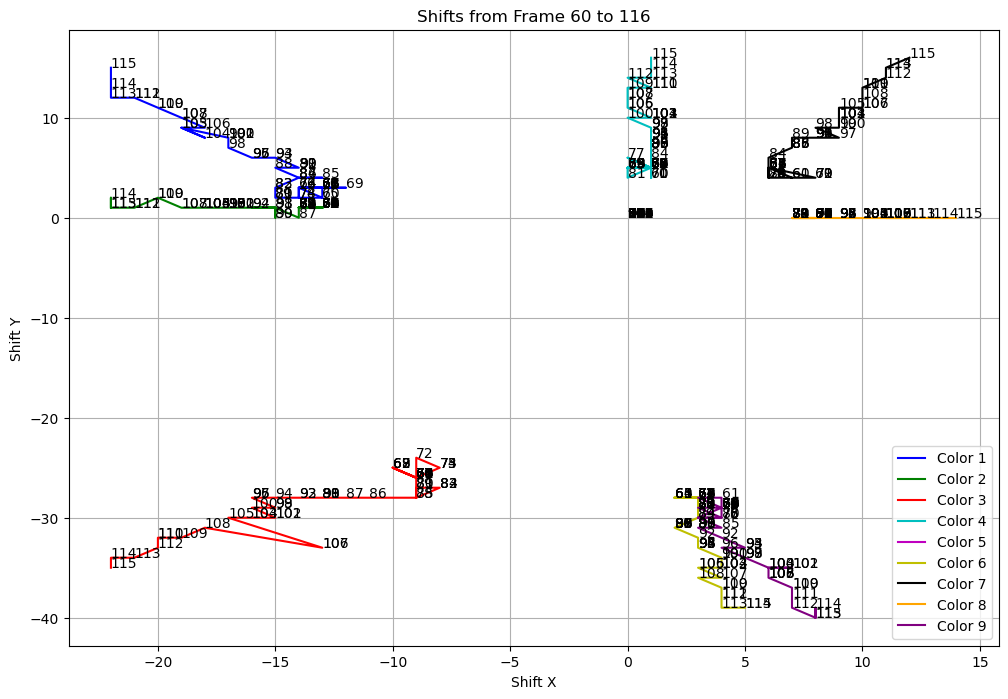

In [11]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']
filtered_shifts = shifts[file_start_num:file_end_num]

for i in range(9):
    shift_x = filtered_shifts[:, i, 0]
    shift_y = filtered_shifts[:, i, 1]
    
    plt.plot(shift_x, shift_y, label=f'Color {i+1}', color=colors[i])
    for j in range(len(shift_x)):
        plt.annotate(str(file_start_num + j), (shift_x[j], shift_y[j]))

plt.xlabel('Shift X')
plt.ylabel('Shift Y')
plt.title('Shifts from Frame {} to {}'.format(file_start_num, file_end_num))
plt.legend()
plt.grid(True)
plt.show()

/var/folders/vb/5ts99k7d0sq0rd4222dzfrsr0000gn/T/ipykernel_82654/167449081.py:49: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_img = interp2d(mesh_x, mesh_y, light_fields[f, :, :, c].T)
/var/folders/vb/5ts99k7d0sq0rd4222dzfrsr0000gn/T/ipykernel_82654/167449081.py:50: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for re

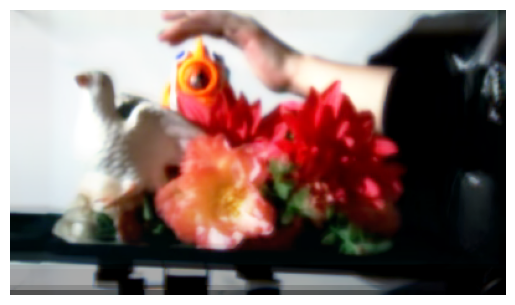

In [12]:
def process_file(file_number):
    img = Image.fromarray(video[file_number])
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.2)  # 调整亮度，1.5表示增加亮度
    contrast_enhancer = ImageEnhance.Contrast(img)
    img = contrast_enhancer.enhance(1.5) 
    color_enhancer = ImageEnhance.Color(img)
    img = color_enhancer.enhance(1.5)

    gamma = 1.5
    img = img.convert('RGB')
    img = np.array(img)
    gamma_correction = np.array(255 * (img / 255) ** (1 / gamma), dtype='uint8')
    img = Image.fromarray(gamma_correction)
    img = np.array(img)

    light_fields = []
    for i in range(3):
        for j in range(3):
            left = vertical_cut[j]
            upper = horizontal_cut[i]
            right = left + sub_widths[j]
            lower = upper + sub_heights[i]
            sub_img = img[upper:lower, left:right]
            if j % 2 == 0:  # Even column, flip left-right
                sub_img = cv2.flip(sub_img, 1)
            if i % 2 == 0:  # Even row, flip up-down
                sub_img = cv2.flip(sub_img, 0)
            sub_img = cv2.flip(sub_img, 0)
            light_fields.append(sub_img)

    max_height = max(sub_img.shape[0] for sub_img in light_fields)
    max_width = max(sub_img.shape[1] for sub_img in light_fields)

    padded_light_fields = []
    for sub_img in light_fields:
        padded_img = np.zeros((max_height, max_width, 3), dtype=sub_img.dtype)
        padded_img[:sub_img.shape[0], :sub_img.shape[1]] = sub_img
        padded_light_fields.append(padded_img)

    light_fields = np.array(padded_light_fields)

    # Merge images using smooth_shifts
    final_image = np.zeros([light_fields.shape[1], light_fields.shape[2], 3])
    pad_image = np.zeros([light_fields.shape[1], light_fields.shape[2], 3])
    mesh_x, mesh_y = np.arange(0, light_fields.shape[1]), np.arange(0, light_fields.shape[2])
    for f in range(light_fields.shape[0]):
        for c in range(3):
            interp_img = interp2d(mesh_x, mesh_y, light_fields[f, :, :, c].T)
            pad_image[:, :, c] = interp_img(mesh_x + shifts[file_number, f, 0], mesh_y + shifts[file_number, f, 1]).T
        final_image += pad_image
    final_image = final_image / (light_fields.shape[0]) / 255
    final_image = (final_image * 255).astype(np.uint8)
    file_name = f"{file_number:05d}.png"
    # imageio.imwrite(os.path.join(output_folder, file_name), final_image)
    return final_image, file_number

refocus_frame = [None] * (file_end_num - file_start_num)
with ThreadPoolExecutor(max_workers=16) as executor:
    futures = [executor.submit(process_file, frame) for frame in range(file_start_num, file_end_num)]
    for future in as_completed(futures):
        result = future.result()
        if result is not None:
            final_image, file_number = result
            refocus_frame[file_number - file_start_num] = final_image

# Display the refocused images as a video
from IPython.display import HTML
import matplotlib.animation as animation

fig, ax = plt.subplots()
def animate(i):
    ax.imshow(refocus_frame[i])
    ax.axis('off')
    return ax
ani = animation.FuncAnimation(fig, animate, frames=len(refocus_frame), interval=100)
HTML(ani.to_html5_video())

